<a href="https://colab.research.google.com/github/bpananalytics/bpananalytics/blob/main/Ceramics%20Survey/Ceramics_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disclaimer
The dataset used below is generated for privacy reasons, and thus contains normalized data that will not have any insights applicable directly to the marketplace. However, the processes and steps involved demonstrate typical renderings for survey analysis.

Below are the questions for the survey administered:

1) Have you taken ceramics before?
- Yes at this studio
- Yes at another studio
- No

2) How would you describe your skill level?
- Beginner
- Beginning Hobbyist
- Intermediate Hobbyist
- Advanced Hobbyist
- Professional Artist

3) Which format do you prefer most?
- Multi-week class
- Specialty Workshops
- Membership access
- Unsure

4) What motivates you to take ceramics? (Select two)
- Stress relief
- Learning skill
- Social connection
- Career exploration
- Activities with friends and family

5) Would you like the opportunity to show/sell your work someday?
- Yes
- No
- Maybe

6) Which offerings interest you the most? (Pick three)
- Hand Building
- Glazing
- Casting
- Family events
- Specialty workshops
- Studio Access

7) When are you most likely to attend?
- Weekday evenings
- Weekday daytime
- Saturday
- Sunday

8) How often would you participate if it fits your schedule?
- Few times a year
- Once a month
- Bimonthly
- Weekly or more

9) Which factors are most important when choosing a ceramics activitiy? (Pick two)
- Schedule / timing
- Price / value
- Instructor quality
- Studio equipment
- Community vibe
- Location / transport

10) If you've taken a class here before, how satisfied were you?
- Very satisfied
- Satisfied
- Neutral
- Unsatisfied

11) On a scale of 1-10, with 10 being the best and 1 being the least, how likely will you recommend us to a friend?

13) How do you usually get to the studio?
- Walk
- Bike
- Public transit
- Drive
- Rideshare

14) Do you have any kids (ages 5-17) who might enjoy ceramics?
- Yes
- No
- Maybe

15) Do you have any additional comments on how we can improve your experience?

In [71]:
import google.colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
from pathlib import Path
drive.mount('/content/drive')

DATA = Path('/content/drive/My Drive/Projects/')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Create fake dataset

In [72]:
!pip install faker
from faker import Faker
fake = Faker()

from faker.providers import BaseProvider  # BaseProvider allows creation of custom data generator
from datetime import datetime, timedelta

In [73]:
def createFakeDatasetSimple(num_examples):
    # Define question structure with their generators
    question_generators = {
        "ID": lambda: fake.random_int(min=100, max=999),  # Item 1
        "First Name": lambda: fake.first_name(),
        "Last Name": lambda: fake.last_name(),
        "Phone": lambda: Faker('en_US').numerify('##########'),
        "Email": lambda: fake.free_email(),
        'Gender': lambda: 'Male' if random.random() < random.uniform(0.2, 0.8) else 'Female',
        'Q1': lambda: random.choice(['Yes, at this studio','Yes, at another studio','No']),
        'Q2': lambda: random.choice(['Beginner','Beginning Hobbyist','Intermediate Hobbyist','Advanced Hobbyist','Professional Artist']),
        'Q3': lambda: random.choice(['Multi-week class','Specialty Workshops','Membership access','Unsure']),

        # Q4 - Select 2 from 5 options (2/5 = 40% probability each)
        'Q4_a': lambda: 'Stress Relief' if random.random() < 0.4 else np.nan,
        'Q4_b': lambda: 'Learning skill' if random.random() < 0.4 else np.nan,
        'Q4_c': lambda: 'Social connection' if random.random() < 0.4 else np.nan,
        'Q4_d': lambda: 'Career Exploration' if random.random() < 0.4 else np.nan,
        'Q4_e': lambda: 'Activities with friends and family' if random.random() < 0.4 else np.nan,

        'Q5': lambda: random.choice(['Yes','No','Maybe']),

        # Q6 - Select 3 from 6 options (3/6 = 50% probability each)
        'Q6_a': lambda: 'Hand Building' if random.random() < 0.5 else np.nan,
        'Q6_b': lambda: 'Glazing' if random.random() < 0.5 else np.nan,
        'Q6_c': lambda: 'Casting' if random.random() < 0.5 else np.nan,
        'Q6_d': lambda: 'Family events' if random.random() < 0.5 else np.nan,
        'Q6_e': lambda: 'Specialty Workshops' if random.random() < 0.5 else np.nan,
        'Q6_f': lambda: 'Studio Access' if random.random() < 0.5 else np.nan,

        'Q7': lambda: random.choice(['Weekday evenings','Weekday daytime','Saturday','Sunday']),
        'Q8': lambda: random.choice(['Few times a year','Once a month','Bimonthly', 'Weekly or more']),

        # Q9 - Select 2 from 6 options (2/6 = 33% probability each)
        'Q9_a': lambda: 'Schedule / timing' if random.random() < 0.33 else np.nan,
        'Q9_b': lambda: 'Price / value' if random.random() < 0.33 else np.nan,
        'Q9_c': lambda: 'Instructor quality' if random.random() < 0.33 else np.nan,
        'Q9_d': lambda: 'Studio equipment' if random.random() < 0.33 else np.nan,
        'Q9_e': lambda: 'Community vibe' if random.random() < 0.33 else np.nan,
        'Q9_f': lambda: 'Location / transport' if random.random() < 0.33 else np.nan,

        'Q10': lambda: random.choice(['Very satisfied','Satisfied','Neutral','Unsatisfied']),
        'Q11': lambda: random.randint(1,10),
        'Q12': lambda: fake.zipcode(),
        'Q13': lambda: random.choice(['Walk','Bike','Public transit','Drive','Rideshare']),
        'Q14': lambda: random.choice(['Yes','No','Maybe']),
        'Q15': lambda: fake.sentence()

    }
    data = {}

    # Generate data for all questions
    for q_id, generator in question_generators.items():
        data[q_id] = [generator() for _ in range(num_examples)]

    return pd.DataFrame(data)

In [74]:
df = createFakeDatasetSimple(100)
df.head(5)

,ID,First Name,Last Name,Phone,Email,Gender,Q1,Q2,Q3,Q4_a,...,Q9_c,Q9_d,Q9_e,Q9_f,Q10,Q11,Q12,Q13,Q14,Q15
0,315,Kari,Smith,6760542283,tonimurphy@gmail.com,Female,"Yes, at this studio",Advanced Hobbyist,Specialty Workshops,NaN,...,NaN,Studio equipment,NaN,Location / transport,Very satisfied,3,13530,Public transit,Maybe,Forget hour reason before investment beautiful...
1,963,Olivia,Fox,5862816217,waynefrancis@hotmail.com,Female,"Yes, at another studio",Intermediate Hobbyist,Membership access,NaN,...,NaN,Studio equipment,Community vibe,NaN,Satisfied,8,25410,Bike,No,Everything have wait responsibility forget spe...
2,849,Allison,Barron,2416325353,james22@gmail.com,Male,No,Intermediate Hobbyist,Unsure,Stress Relief,...,NaN,NaN,NaN,NaN,Neutral,6,50702,Walk,Yes,Worry blue mother certainly physical arrive.
3,778,Craig,Mccarthy,2663580362,thomas74@hotmail.com,Female,"Yes, at this studio",Advanced Hobbyist,Unsure,Stress Relief,...,NaN,NaN,NaN,Location / transport,Unsatisfied,8,58061,Bike,No,Green cultural moment majority case.
4,470,Erin,Hoffman,1829141349,mayeric@gmail.com,Female,"Yes, at this studio",Beginning Hobbyist,Membership access,Stress Relief,...,Instructor quality,NaN,NaN,NaN,Neutral,7,00923,Bike,No,High attack rest may story push feeling.


In [75]:
print(df.iloc[1,:])

ID                                                          963
First Name                                               Olivia
Last Name                                                   Fox
Phone                                                5862816217
Email                                  waynefrancis@hotmail.com
Gender                                                   Female
Q1                                       Yes, at another studio
Q2                                        Intermediate Hobbyist
Q3                                            Membership access
Q4_a                                                        NaN
Q4_b                                             Learning skill
Q4_c                                                        NaN
Q4_d                                                        NaN
Q4_e                         Activities with friends and family
Q5                                                           No
Q6_a                                    

In [76]:
# df.to_csv(DATA/'ceramics_survey_data.csv', index=False)
# print('Done')

# Exploratory Data Analysis

In [77]:
df = pd.read_csv(DATA/'ceramics_survey_data.csv')

In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.isnull().sum()

,0
ID,0
First Name,0
Last Name,0
Phone,0
Email,0
Gender,0
Q1,0
Q2,0
Q3,0
Q4_a,62


Null values to be expected for checkboxes options. This is acceptable.

## Gender

In [80]:
df.Gender.value_counts()

,count
Gender,
Female,58
Male,42


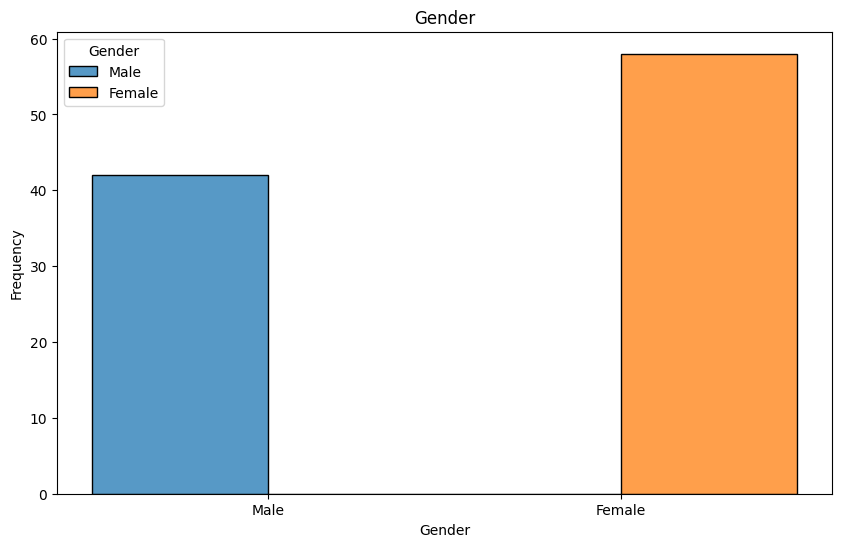

In [81]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Gender',fill=True, hue='Gender', multiple='dodge')

plt.title('Gender')
# plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q1: Have you taken ceramics before?


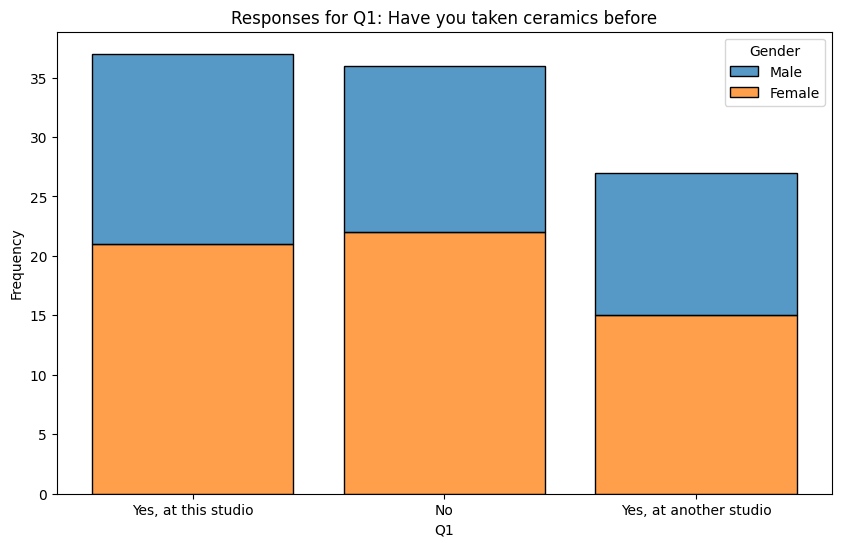

In [82]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Q1',fill=True, hue='Gender', multiple='stack', shrink=0.8)

plt.title('Responses for Q1: Have you taken ceramics before')
# plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q2: How would you describe your skill level?

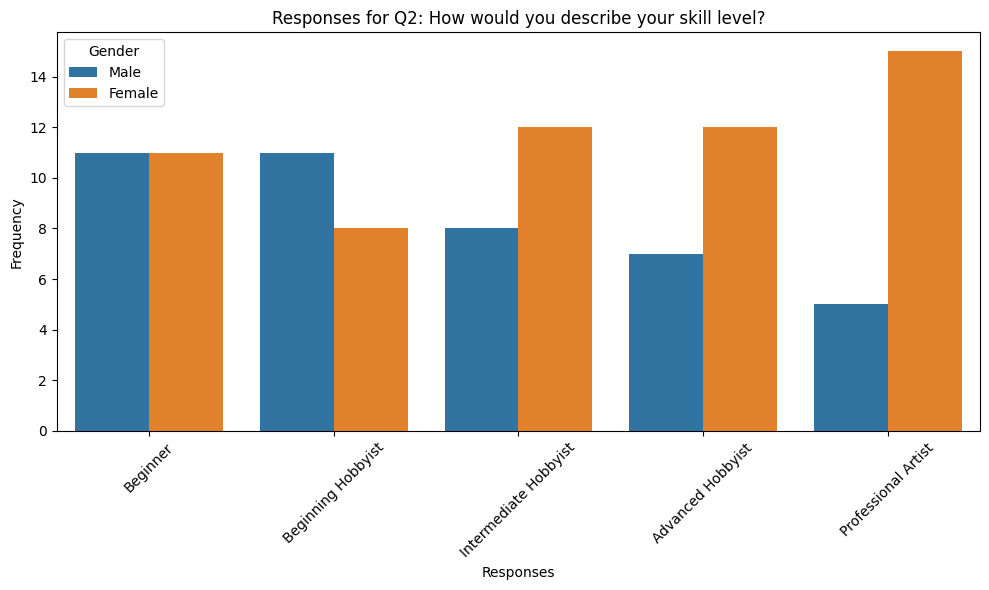

In [83]:
plt.figure(figsize=(10, 6))

desired_order = ['Beginner', 'Beginning Hobbyist', 'Intermediate Hobbyist', 'Advanced Hobbyist','Professional Artist']

sns.countplot(data=df, x='Q2', hue='Gender', order=desired_order) #Opt for countplot due to lack of ordering feature for hist

plt.title('Responses for Q2: How would you describe your skill level?')
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q3: Which format do you prefer most?

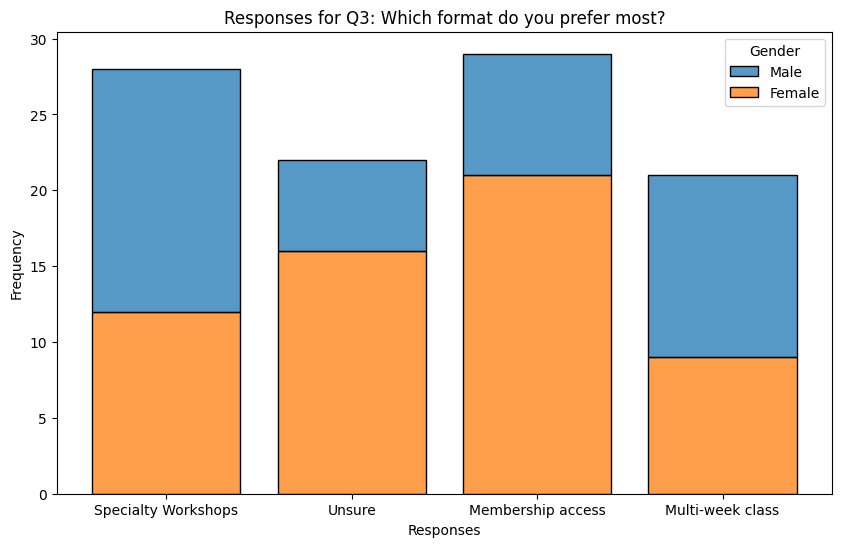

In [84]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Q3',fill=True, hue='Gender', multiple='stack', shrink=0.8)

plt.title('Responses for Q3: Which format do you prefer most?')
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q4: What motivates you to take ceramic? (Select two)

In [85]:
for i in range(len(df.columns)):
  print(i, df.columns[i])

0 ID
1 First Name
2 Last Name
3 Phone
4 Email
5 Gender
6 Q1
7 Q2
8 Q3
9 Q4_a
10 Q4_b
11 Q4_c
12 Q4_d
13 Q4_e
14 Q5
15 Q6_a
16 Q6_b
17 Q6_c
18 Q6_d
19 Q6_e
20 Q6_f
21 Q7
22 Q8
23 Q9_a
24 Q9_b
25 Q9_c
26 Q9_d
27 Q9_e
28 Q9_f
29 Q10
30 Q11
31 Q12
32 Q13
33 Q14
34 Q15


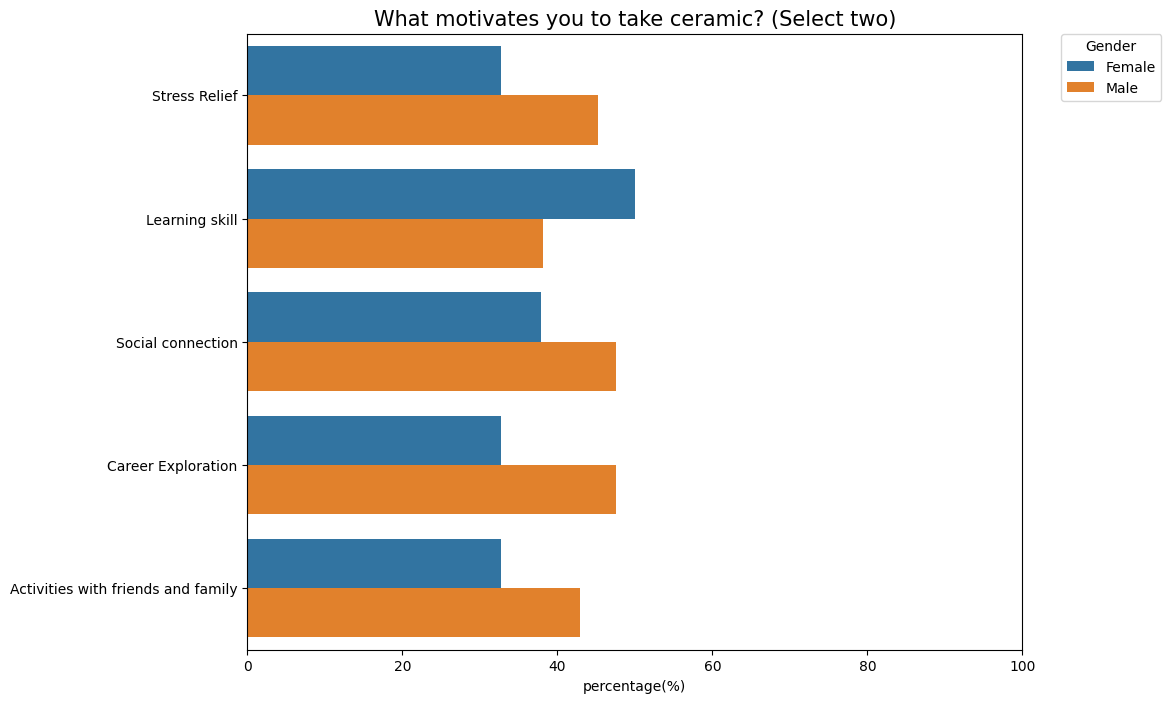

In [86]:
# Step 0: Define the data
data = df
column_range = range(9,14) # These are the columns for the options
group_column = 'Gender'  # Define your group column here
column_names = df.columns[column_range].tolist()  # Get actual column names
question_text = "What motivates you to take ceramic? (Select two)"  # Replace with your actual question text

# Step 1: Prepare the data for plotting
selected_columns = column_names + [group_column]
subset_data = data[selected_columns]

# Step 2: Group and count the data
series = subset_data.groupby([group_column]).count().T

# Step 3: Create the summary table
res = []
group_counts = data[group_column].value_counts()

for group in series.columns:
    for i, col_name in enumerate(series.index):
        if col_name != group_column:  # Skip the group column itself
            option_text = column_names[i]  # Use the column name as option text
            count_value = series.loc[col_name, group]
            percentage = (count_value / group_counts[group] * 100).round(2)
            res.append([percentage, option_text, group])

table_sum = pd.DataFrame(columns=["percentage(%)", "options", "group"], data=res)


# Step 4: Rename the options
# Define mapping for option names
option_mapping = {
    'Q4_a': 'Stress Relief',
    'Q4_b': 'Learning skill',
    'Q4_c': 'Social connection',
    'Q4_d': 'Career Exploration',
    'Q4_e': 'Activities with friends and family'
}


# Replace the values
table_sum['options'] = table_sum['options'].replace(option_mapping)


# Step 4: Create the chart
listOfGroup = list(data[group_column].unique())
listOfGroup.sort()

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(
    x="percentage(%)",
    y="options",
    hue="group",
    hue_order=listOfGroup,
    data=table_sum,
)
ax.set(xlim=(0, 100))
ax.set_ylabel("")
plt.title(question_text, fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title=group_column)
plt.show()

## Q5: Would you like the opportunity to show/sell your work someday?

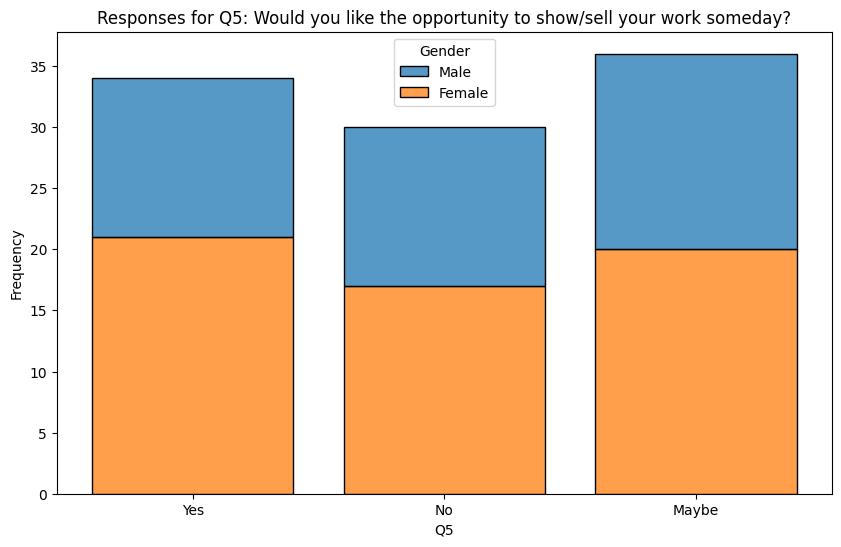

In [87]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Q5',fill=True, hue='Gender', multiple='stack', shrink=0.8)

plt.title('Responses for Q5: Would you like the opportunity to show/sell your work someday?')
# plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q6: Which offerings interest you the most? (Pick three)

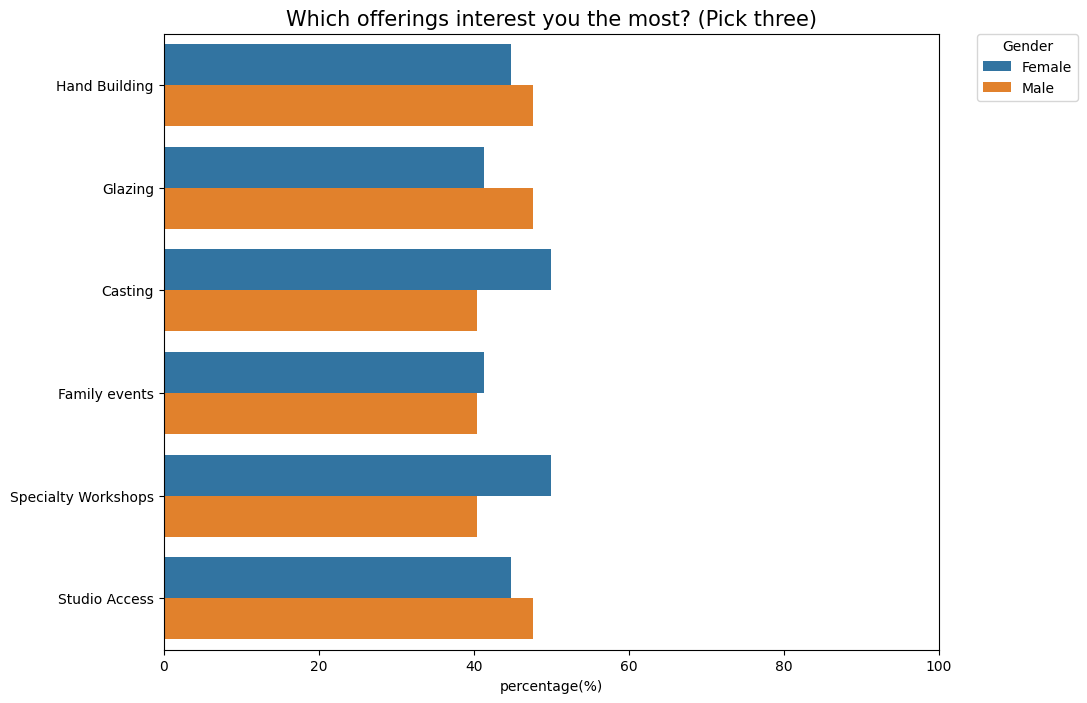

In [88]:
# Step 0: Define the data
data = df
column_range = range(15,21) # These are the columns for the options
group_column = 'Gender'  # Define your group column here
column_names = df.columns[column_range].tolist()  # Get actual column names
question_text = "Which offerings interest you the most? (Pick three)"  # Replace with your actual question text

# Step 1: Prepare the data for plotting
selected_columns = column_names + [group_column]
subset_data = data[selected_columns]

# Step 2: Group and count the data
series = subset_data.groupby([group_column]).count().T

# Step 3: Create the summary table
res = []
group_counts = data[group_column].value_counts()

for group in series.columns:
    for i, col_name in enumerate(series.index):
        if col_name != group_column:  # Skip the group column itself
            option_text = column_names[i]  # Use the column name as option text
            count_value = series.loc[col_name, group]
            percentage = (count_value / group_counts[group] * 100).round(2)
            res.append([percentage, option_text, group])

table_sum = pd.DataFrame(columns=["percentage(%)", "options", "group"], data=res)


# Step 4: Rename the options
# Define mapping for option names
option_mapping = {
    'Q6_a': 'Hand Building',
    'Q6_b': 'Glazing',
    'Q6_c': 'Casting',
    'Q6_d': 'Family events',
    'Q6_e': 'Specialty Workshops',
    'Q6_f': 'Studio Access'
}


# Replace the values
table_sum['options'] = table_sum['options'].replace(option_mapping)


# Step 4: Create the chart
listOfGroup = list(data[group_column].unique())
listOfGroup.sort()

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(
    x="percentage(%)",
    y="options",
    hue="group",
    hue_order=listOfGroup,
    data=table_sum,
)
ax.set(xlim=(0, 100))
ax.set_ylabel("")
plt.title(question_text, fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title=group_column)
plt.show()

## Q7: When are you most likely to attend?

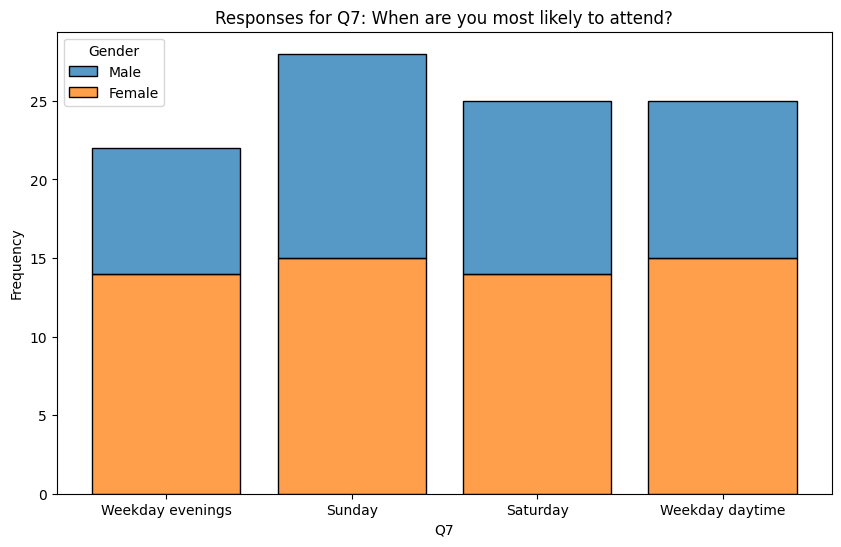

In [89]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Q7',fill=True, hue='Gender', multiple='stack', shrink=0.8)

plt.title('Responses for Q7: When are you most likely to attend?')
# plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q8: How often would you participate if it fits your schedule?

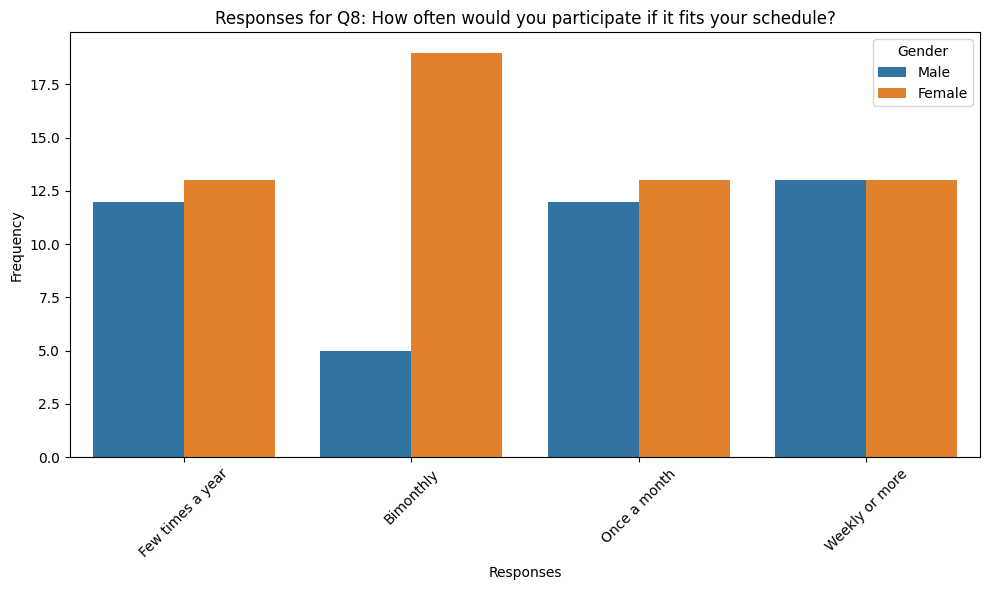

In [90]:
plt.figure(figsize=(10, 6))

desired_order = ['Few times a year', 'Bimonthly','Once a month','Weekly or more']

sns.countplot(data=df, x='Q8', hue='Gender', order=desired_order) #Opt for countplot due to lack of ordering feature for hist

plt.title('Responses for Q8: How often would you participate if it fits your schedule?')
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Q9: Which factors are most important when choosing a ceramics activity? (Pick two)

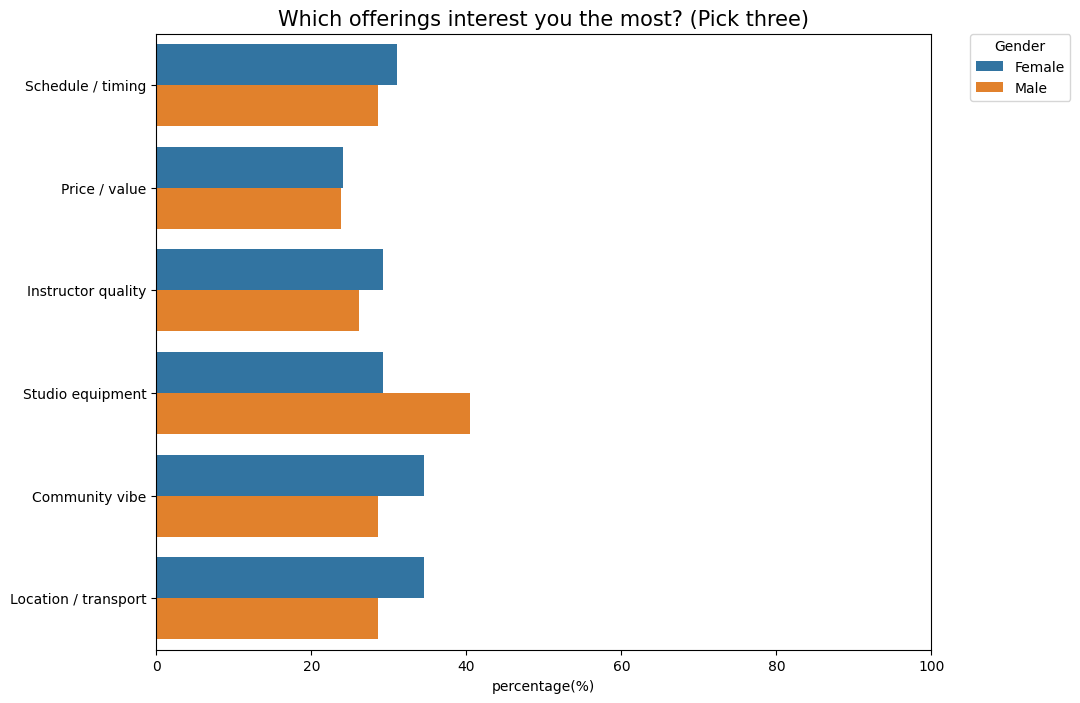

In [91]:
# Step 0: Define the data
data = df
column_range = range(23,29) # These are the columns for the options
group_column = 'Gender'  # Define your group column here
column_names = df.columns[column_range].tolist()  # Get actual column names
question_text = "Which offerings interest you the most? (Pick three)"  # Replace with your actual question text

# Step 1: Prepare the data for plotting
selected_columns = column_names + [group_column]
subset_data = data[selected_columns]

# Step 2: Group and count the data
series = subset_data.groupby([group_column]).count().T

# Step 3: Create the summary table
res = []
group_counts = data[group_column].value_counts()

for group in series.columns:
    for i, col_name in enumerate(series.index):
        if col_name != group_column:  # Skip the group column itself
            option_text = column_names[i]  # Use the column name as option text
            count_value = series.loc[col_name, group]
            percentage = (count_value / group_counts[group] * 100).round(2)
            res.append([percentage, option_text, group])

table_sum = pd.DataFrame(columns=["percentage(%)", "options", "group"], data=res)


# Step 4: Rename the options
# Define mapping for option names
option_mapping = {
    'Q9_a': 'Schedule / timing',
    'Q9_b': 'Price / value',
    'Q9_c': 'Instructor quality',
    'Q9_d': 'Studio equipment',
    'Q9_e': 'Community vibe',
    'Q9_f': 'Location / transport'
}


# Replace the values
table_sum['options'] = table_sum['options'].replace(option_mapping)


# Step 4: Create the chart
listOfGroup = list(data[group_column].unique())
listOfGroup.sort()

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(
    x="percentage(%)",
    y="options",
    hue="group",
    hue_order=listOfGroup,
    data=table_sum,
)
ax.set(xlim=(0, 100))
ax.set_ylabel("")
plt.title(question_text, fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title=group_column)
plt.show()

## Q10: If you've taken a class here before, how satisfied were you?

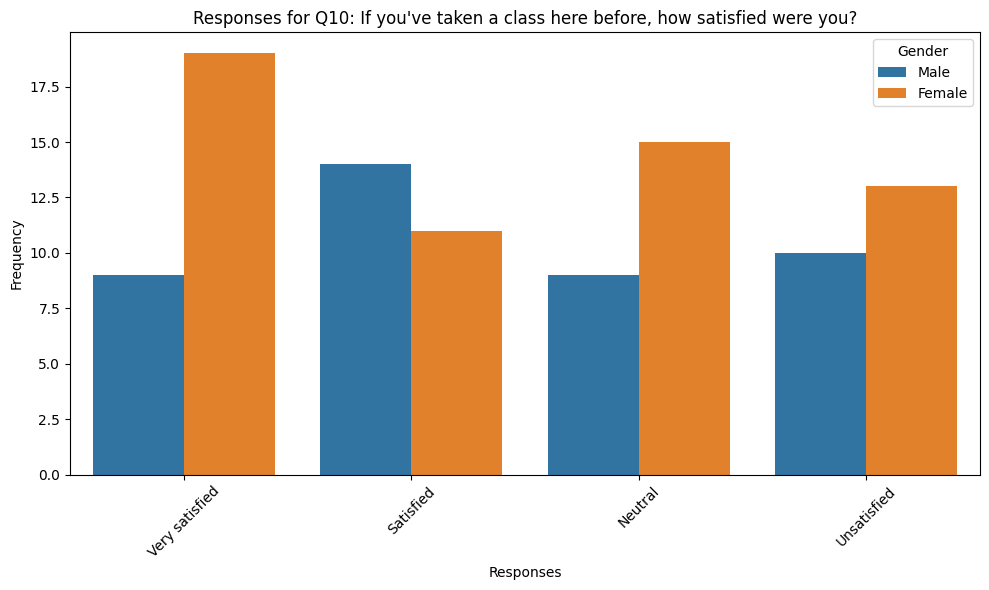

In [92]:
plt.figure(figsize=(10, 6))

desired_order = ['Very satisfied', 'Satisfied','Neutral','Unsatisfied']

sns.countplot(data=df, x='Q10', hue='Gender', order=desired_order) #Opt for countplot due to lack of ordering feature for hist

plt.title("Responses for Q10: If you've taken a class here before, how satisfied were you?")
plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Q11: On a scale of 1-10, with 10 being the best and 1 being the least, how likely will you recommend us to a friend?

<Axes: xlabel='Q11', ylabel='Density'>

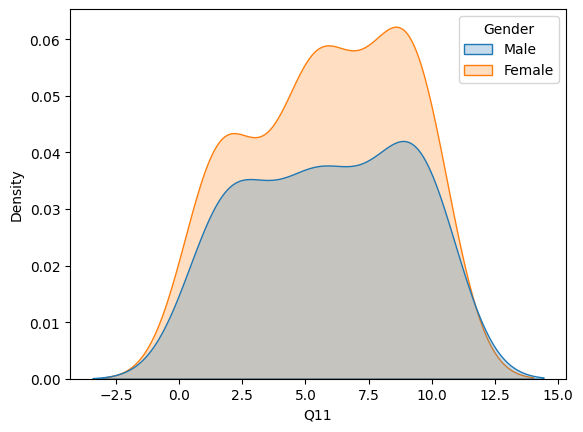

In [93]:
sns.kdeplot(data=df, x='Q11', shade=True, hue="Gender")


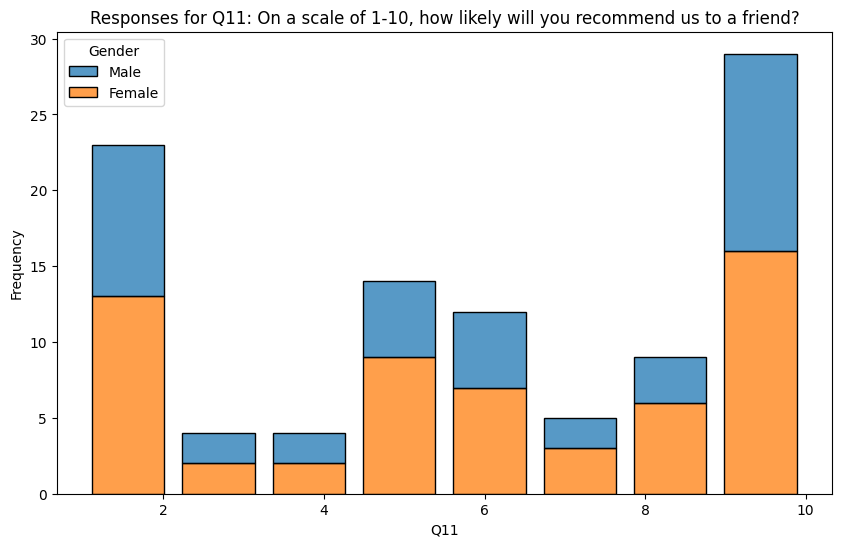

In [94]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Q11',fill=True, hue='Gender', multiple='stack', shrink=0.8)

plt.title('Responses for Q11: On a scale of 1-10, how likely will you recommend us to a friend?')
# plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q13: How do you usually get to the studio?

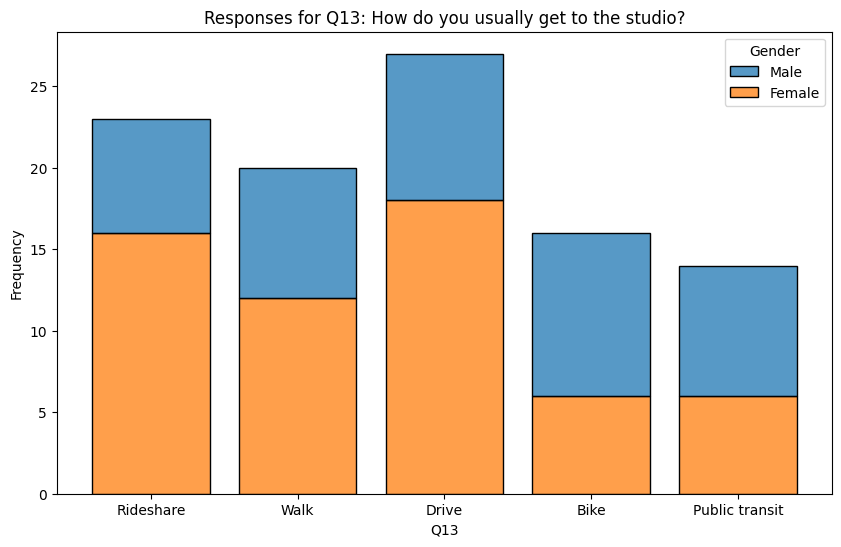

In [95]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Q13',fill=True, hue='Gender', multiple='stack', shrink=0.8)

plt.title('Responses for Q13: How do you usually get to the studio?')
# plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q14: Do you have any kids (ages 5-17) who might enjoy ceramics?

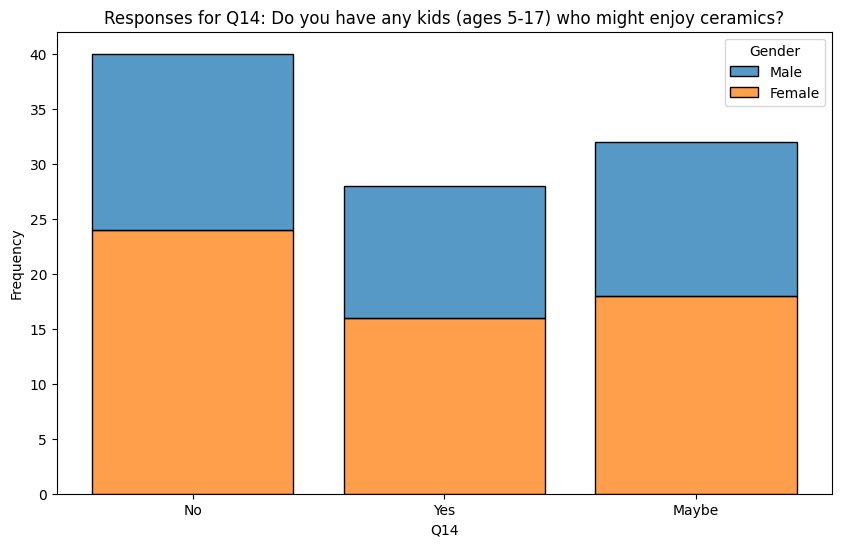

In [96]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x= 'Q14',fill=True, hue='Gender', multiple='stack', shrink=0.8)

plt.title('Responses for Q14: Do you have any kids (ages 5-17) who might enjoy ceramics?')
# plt.xlabel('Responses')
plt.ylabel('Frequency')
plt.show()

## Q15: Customer feedback

### Text stats

In [97]:
def basic_text_stats(df, text_column):
    """Calculate basic text statistics"""
    stats = {}

    # Character and word counts
    df['char_count'] = df[text_column].str.len()
    df['word_count'] = df[text_column].str.split().str.len()
    df['sentence_count'] = df[text_column].str.split('[.!?]').str.len()
    df['avg_word_length'] = df['char_count'] / df['word_count']

    stats.update({
        'total_documents': len(df),
        'total_characters': df['char_count'].sum(),
        'total_words': df['word_count'].sum(),
        'avg_words_per_doc': df['word_count'].mean(),
        'avg_chars_per_doc': df['char_count'].mean(),
        'vocabulary_size': len(set(' '.join(df[text_column]).split())),
        'avg_word_length': df['avg_word_length'].mean()
    })

    return stats, df

# Calculate stats
stats, df = basic_text_stats(df, 'Q15')
print("Basic Text Statistics:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Basic Text Statistics:
total_documents: 100
total_characters: 3555
total_words: 544
avg_words_per_doc: 5.44
avg_chars_per_doc: 35.55
vocabulary_size: 487
avg_word_length: 6.54


### Wordcloud

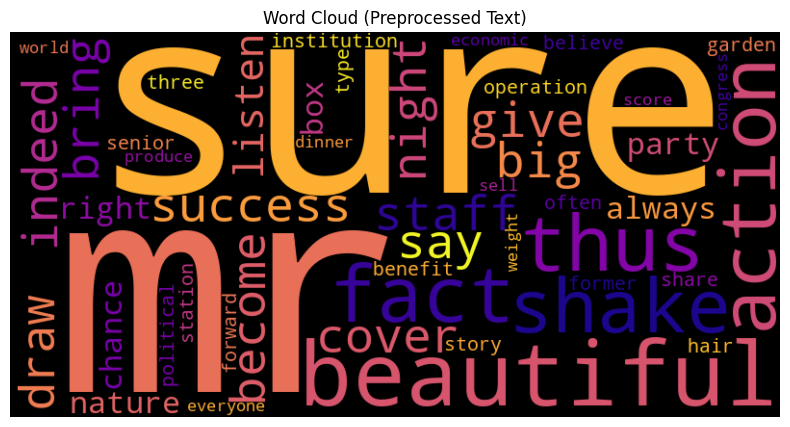

In [98]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS  # ← Import STOPWORDS
import matplotlib.pyplot as plt
import re

def preprocess_text(text):
    """Clean and preprocess text data"""
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

# Apply preprocessing
df['cleaned_text'] = df['Q15'].apply(preprocess_text)

# Combine cleaned text
cleaned_text = ' '.join(df['cleaned_text'])

# Create word cloud WITH stopwords removed
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=50,
    stopwords=set(STOPWORDS)  # ← This removes stop words!
).generate(cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Preprocessed Text)')
plt.show()

### Distribution Visualizations

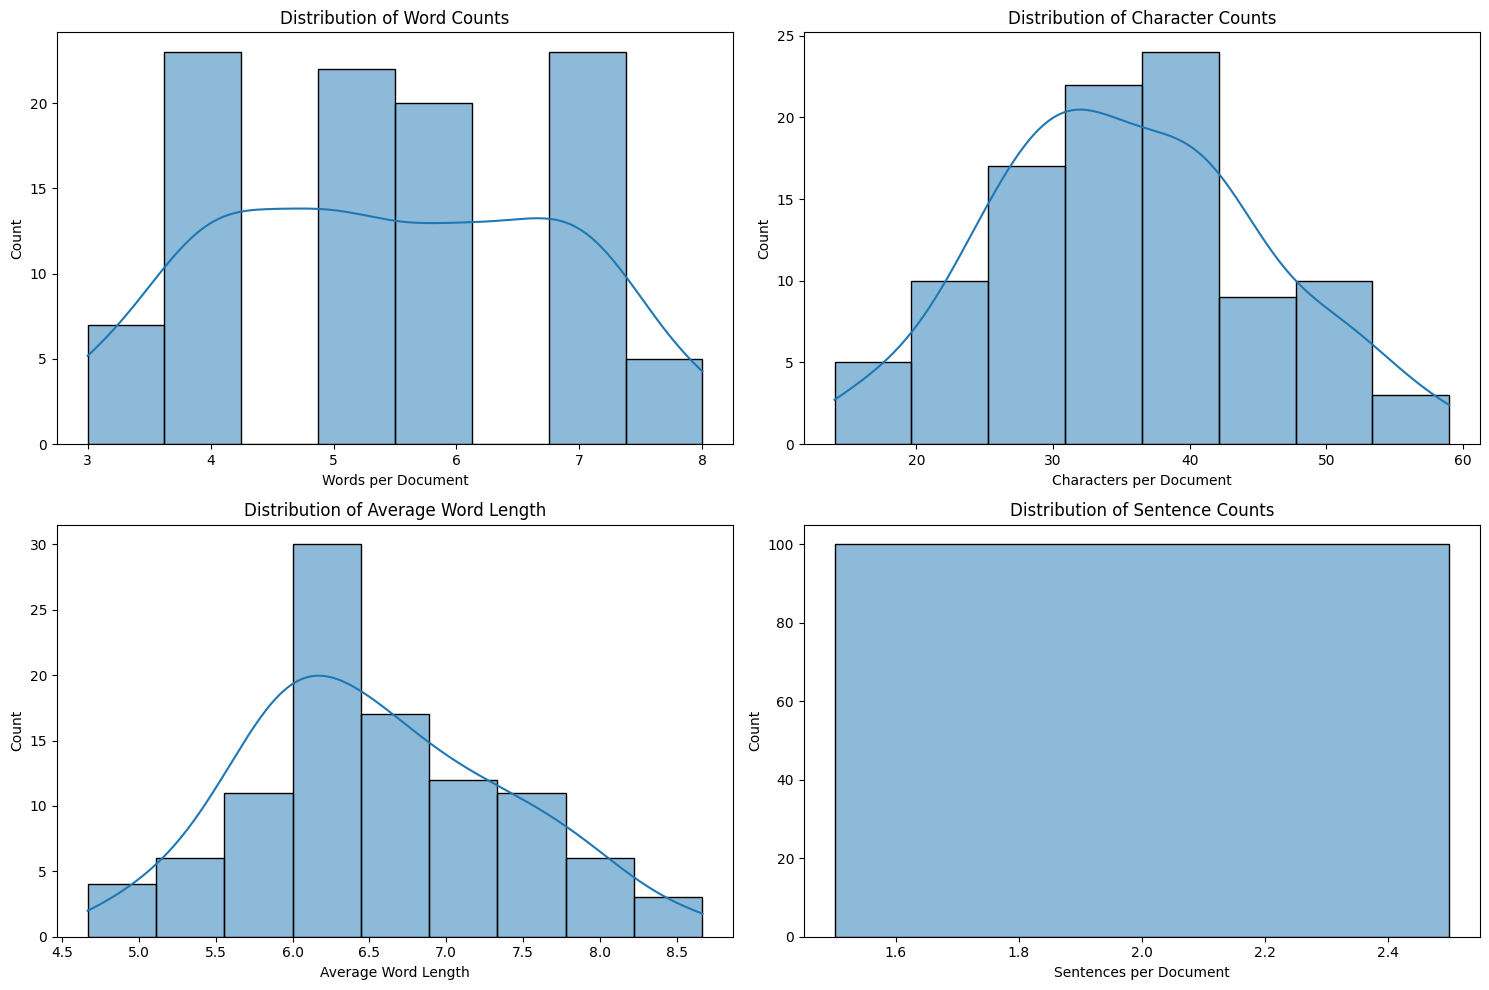

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_text_distributions(df):
    """Plot distributions of text characteristics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Word count distribution
    sns.histplot(data=df, x='word_count', ax=axes[0,0], kde=True)
    axes[0,0].set_title('Distribution of Word Counts')
    axes[0,0].set_xlabel('Words per Document')

    # Character count distribution
    sns.histplot(data=df, x='char_count', ax=axes[0,1], kde=True)
    axes[0,1].set_title('Distribution of Character Counts')
    axes[0,1].set_xlabel('Characters per Document')

    # Average word length
    sns.histplot(data=df, x='avg_word_length', ax=axes[1,0], kde=True)
    axes[1,0].set_title('Distribution of Average Word Length')
    axes[1,0].set_xlabel('Average Word Length')

    # Sentence count
    sns.histplot(data=df, x='sentence_count', ax=axes[1,1], kde=True)
    axes[1,1].set_title('Distribution of Sentence Counts')
    axes[1,1].set_xlabel('Sentences per Document')

    plt.tight_layout()
    plt.show()

plot_text_distributions(df)

### N-gram Analysis

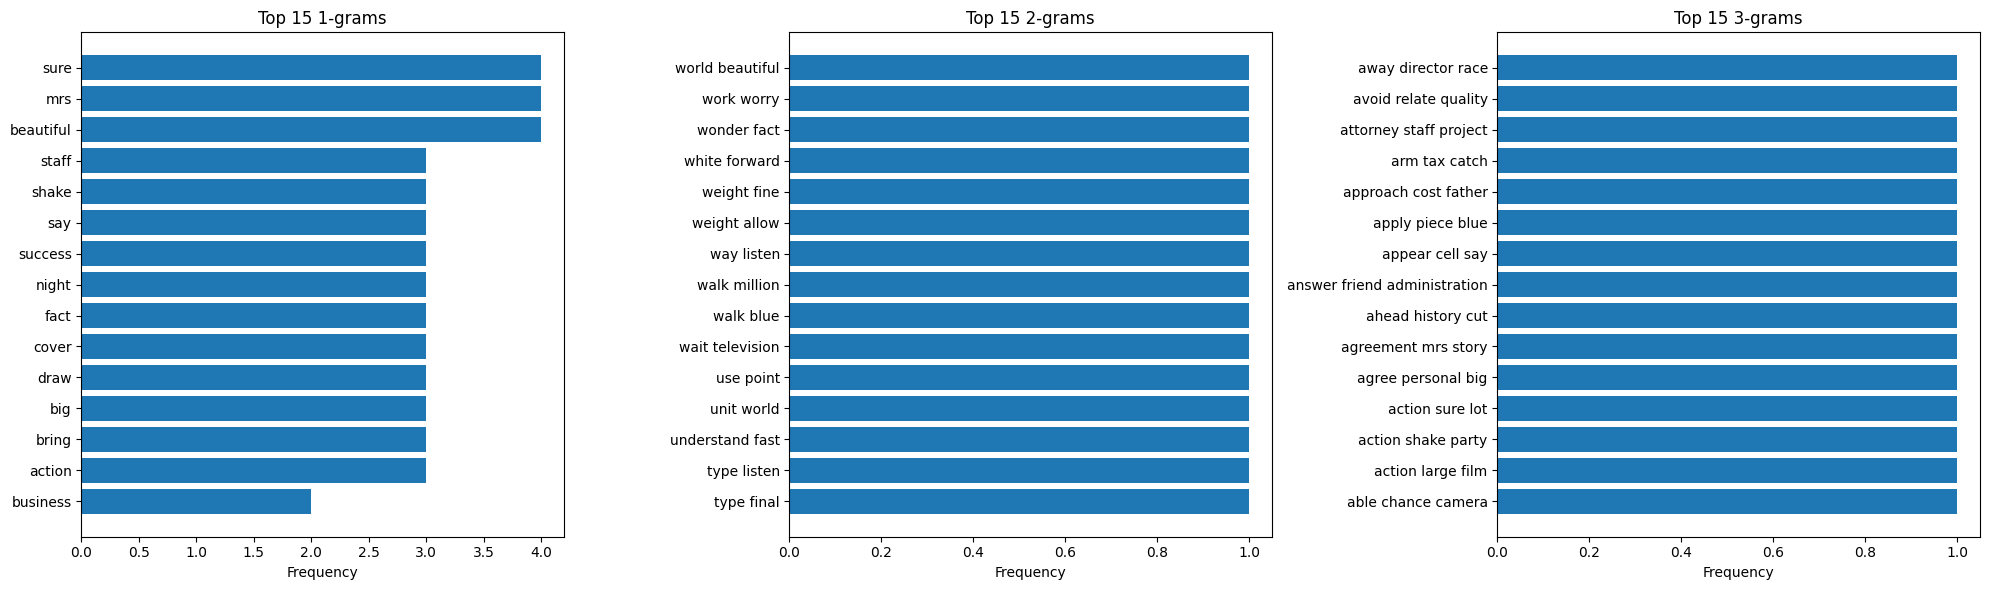

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def plot_ngrams(df, text_column, ngram_range=(1, 3), top_n=15):
    """Analyze and plot most common n-grams"""
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, n in enumerate([1, 2, 3]):  # Unigrams, bigrams, trigrams
        # Create vectorizer for specific n-gram
        vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english', max_features=top_n)
        X = vectorizer.fit_transform(df[text_column])

        # Get frequencies
        ngram_freq = pd.DataFrame({
            'ngram': vectorizer.get_feature_names_out(),
            'frequency': X.sum(axis=0).A1
        }).sort_values('frequency', ascending=True)

        # Plot
        axes[i].barh(ngram_freq['ngram'], ngram_freq['frequency'])
        axes[i].set_title(f'Top {top_n} {n}-grams')
        axes[i].set_xlabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_ngrams(df, 'Q15')

### Text quality metric

In [101]:
!pip install textstat

import re
from textstat import flesch_reading_ease, syllable_count

def calculate_readability(text):
    """Calculate readability scores"""
    try:
        return flesch_reading_ease(text)
    except:
        return None

def calculate_lexical_diversity(text):
    """Calculate lexical diversity (type-token ratio)"""
    words = text.split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# Apply readability and diversity metrics
df['readability_score'] = df['Q15'].apply(calculate_readability)
df['lexical_diversity'] = df['Q15'].apply(calculate_lexical_diversity)

print("Readability Statistics:")
print(f"Average Readability Score: {df['readability_score'].mean():.2f}")
print(f"Average Lexical Diversity: {df['lexical_diversity'].mean():.3f}")

Readability Statistics:
Average Readability Score: 53.43
Average Lexical Diversity: 1.000


### Part of Speech Analysis

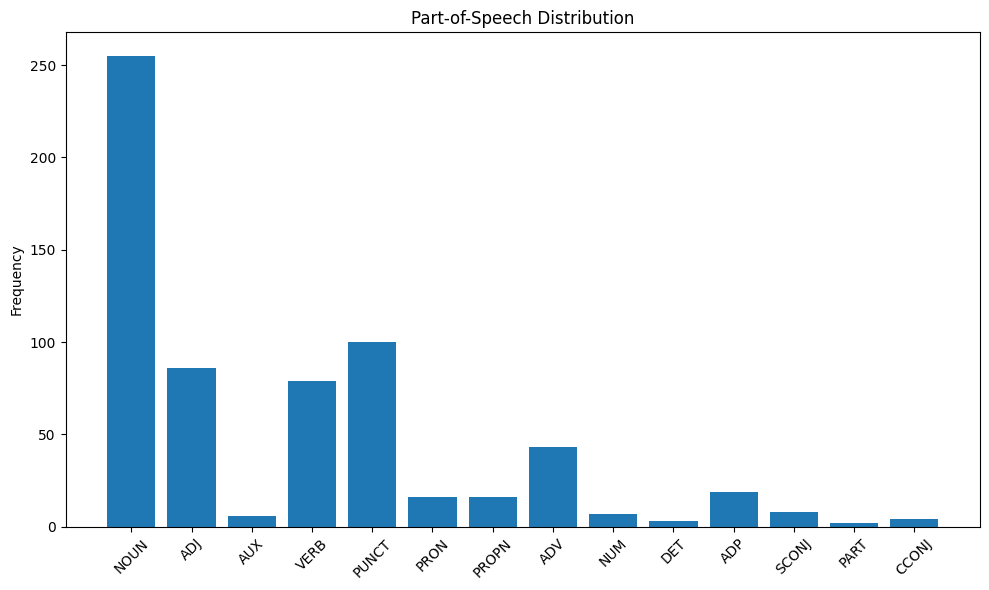

In [102]:
!pip install spacy
import spacy
from collections import Counter

# Load spaCy model (install first: !python -m spacy download en_core_web_sm)
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load("en_core_web_sm") # or another suitable model like "en_core_web_md", "en_core_web_lg"


def analyze_pos(text_sample):
    """Analyze part-of-speech distribution"""
    doc = nlp(text_sample)
    pos_counts = Counter([token.pos_ for token in doc])
    return pos_counts

# Apply to a sample of texts
sample_text = ' '.join(df['Q15'].sample(min(1000, len(df))))
pos_counts = analyze_pos(sample_text)

# Plot POS distribution
plt.figure(figsize=(10, 6))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('Part-of-Speech Distribution')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


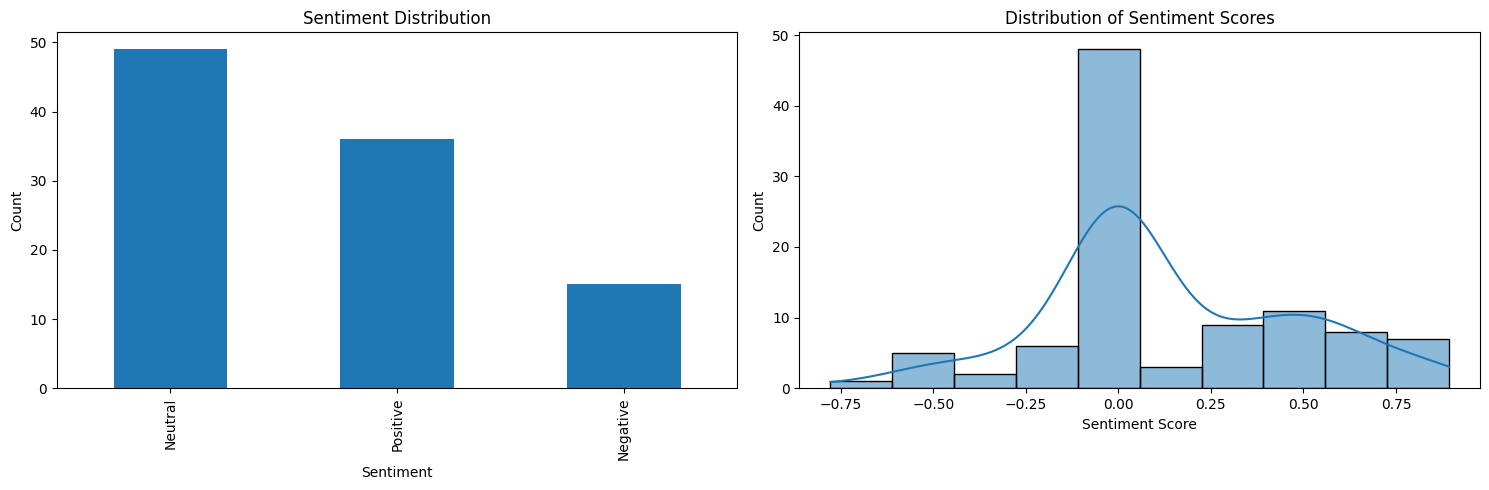

In [103]:
!pip install nltk
!pip install textblob

from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sentiment(df, text_column):
    """Perform sentiment analysis"""
    sia = SentimentIntensityAnalyzer()

    # Calculate sentiment scores - FIXED: use polarity_scores instead of polarity_sentences
    df['sentiment_compound'] = df[text_column].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment_polarity'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['sentiment_subjectivity'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    # Categorize sentiment
    df['sentiment_label'] = pd.cut(df['sentiment_compound'],
                                  bins=[-1, -0.1, 0.1, 1],
                                  labels=['Negative', 'Neutral', 'Positive'])

    return df

# Make sure you have your dataframe 'df' defined before calling this function
# df = pd.DataFrame({'Q15': ['I love this!', 'This is terrible', 'It is okay']})

df = analyze_sentiment(df, 'Q15')

# Plot sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentiment distribution
df['sentiment_label'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Sentiment scores distribution
sns.histplot(data=df, x='sentiment_compound', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Sentiment Scores')
axes[1].set_xlabel('Sentiment Score')

plt.tight_layout()
plt.show()

### Entity Analysis
This looks at the who, what, when, where why

In [111]:
# !pip install
#import spacy

#nlp = spacy.load("en_core_web_sm")

def extract_entities(df, text_column):
    """Extract named entities from text"""
    # This requires spaCy
    # nlp = spacy.load('en_core_web_sm')

    entities = []
    for text in df[text_column].head(100):  # Sample for performance
        doc = nlp(str(text))
        for ent in doc.ents:
            entities.append({
                'text': ent.text,
                'label': ent.label_,
                'start': ent.start_char,
                'end': ent.end_char
            })

    entities_df = pd.DataFrame(entities)
    if not entities_df.empty:
        print("Most Common Entities:")
        print(entities_df['label'].value_counts().head(10))

    return entities_df

entities_df = extract_entities(df, 'Q15')

Most Common Entities:
label
CARDINAL    7
TIME        4
ORG         2
ORDINAL     2
PERSON      2
PRODUCT     1
Name: count, dtype: int64


### Topic Modeling (LDA)

In [115]:
!pip install pyldavis

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model

def topic_modeling(df, text_column, n_topics=5):
    """Perform LDA topic modeling"""
    # Vectorize text
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(df[text_column])

    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # Display topics
    feature_names = vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[-10:][::-1]]
        print(" ".join(top_words))
        print()

    return lda, vectorizer, X

# Perform topic modeling
lda, vectorizer, X = topic_modeling(df, 'Q15')

# Optional: Create interactive visualization
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.sklearn.prepare(lda, X, vectorizer)
# pyLDAvis.display(vis)

Topic #1:
sure night fact indicate risk forward blue bring paper walk

Topic #2:
big staff economic sell station right quality political institution cover

Topic #3:
success mrs believe story garden house successful left event tax

Topic #4:
beautiful shake action draw box lose world writer common friend

Topic #5:
say dinner treat rich weight chance listen cover explain true



### Text Similarity and Clustering

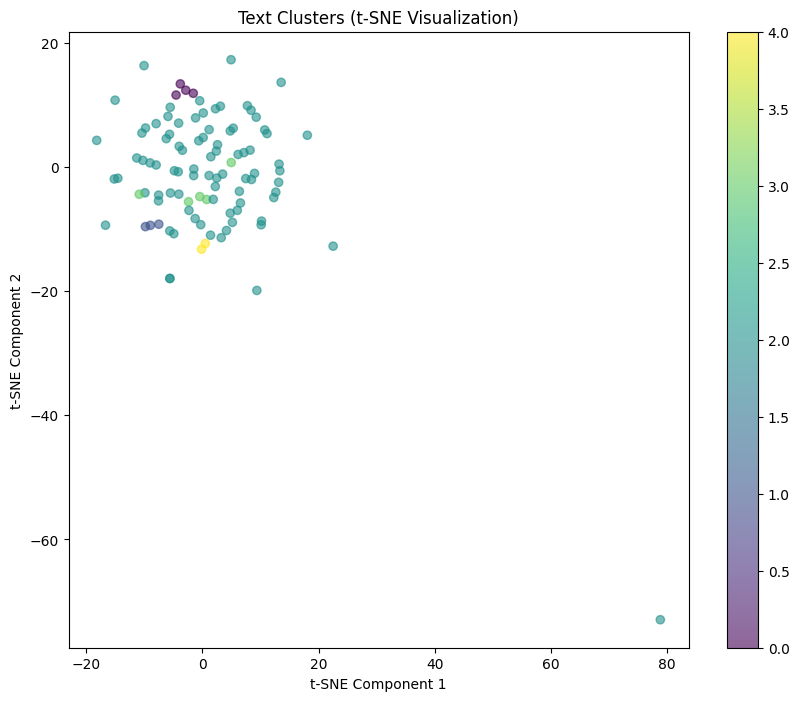

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

def text_similarity_analysis(df, text_column):
    """Analyze text similarity and clustering"""
    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df[text_column])

    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Clustering
    n_clusters = min(5, len(df))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)

    df['cluster'] = clusters

    # Dimensionality reduction for visualization
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(tfidf_matrix.toarray())

    # Plot clusters
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1],
                         c=clusters, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.title('Text Clusters (t-SNE Visualization)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

    return similarity_matrix, clusters

similarity_matrix, clusters = text_similarity_analysis(df, 'Q15')

### Comprehensive Text  Analysis

In [112]:
def generate_text_eda_report(df, text_column):
    """Generate comprehensive text EDA report"""

    print("=" * 50)
    print("COMPREHENSIVE TEXT EDA REPORT")
    print("=" * 50)

    # Basic stats
    stats, _ = basic_text_stats(df, text_column)
    print("\n1. BASIC STATISTICS:")
    for key, value in stats.items():
        print(f"   {key}: {value}")

    # Text quality
    print(f"\n2. TEXT QUALITY:")
    print(f"   Average Readability: {df['readability_score'].mean():.2f}")
    print(f"   Average Lexical Diversity: {df['lexical_diversity'].mean():.3f}")

    # Sentiment summary
    print(f"\n3. SENTIMENT ANALYSIS:")
    sentiment_summary = df['sentiment_label'].value_counts()
    for sentiment, count in sentiment_summary.items():
        print(f"   {sentiment}: {count} documents ({count/len(df)*100:.1f}%)")

    # Most common words
    from collections import Counter
    all_words = ' '.join(df[text_column]).split()
    word_freq = Counter([word.lower() for word in all_words if word.lower() not in STOPWORDS and len(word) > 2])

    print(f"\n4. TOP 10 MOST FREQUENT WORDS:")
    for word, freq in word_freq.most_common(10):
        print(f"   {word}: {freq}")

    # Document length analysis
    print(f"\n5. DOCUMENT LENGTH ANALYSIS:")
    print(f"   Shortest document: {df['word_count'].min()} words")
    print(f"   Longest document: {df['word_count'].max()} words")
    print(f"   Median length: {df['word_count'].median()} words")

    # Missing data
    missing_count = df[text_column].isnull().sum()
    print(f"\n6. DATA QUALITY:")
    print(f"   Missing values: {missing_count} ({missing_count/len(df)*100:.1f}%)")

# Generate report
generate_text_eda_report(df, 'Q15')

COMPREHENSIVE TEXT EDA REPORT

1. BASIC STATISTICS:
   total_documents: 100
   total_characters: 3555
   total_words: 544
   avg_words_per_doc: 5.44
   avg_chars_per_doc: 35.55
   vocabulary_size: 487
   avg_word_length: 6.542595238095239

2. TEXT QUALITY:
   Average Readability: 53.43
   Average Lexical Diversity: 1.000

3. SENTIMENT ANALYSIS:
   Neutral: 49 documents (49.0%)
   Positive: 36 documents (36.0%)
   Negative: 15 documents (15.0%)

4. TOP 10 MOST FREQUENT WORDS:
   mrs: 4
   fact: 3
   action: 3
   shake: 3
   staff: 3
   indeed: 3
   become: 3
   cover: 3
   big: 3
   night: 3

5. DOCUMENT LENGTH ANALYSIS:
   Shortest document: 3 words
   Longest document: 8 words
   Median length: 5.0 words

6. DATA QUALITY:
   Missing values: 0 (0.0%)


# Understanding the Customers by Proficiency

This section will focus on discovering the customer profile of each proficiency group. Exploring this variable may lead to proper customer segmentation.

In [131]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
df = pd.read_csv(DATA/'ceramics_survey_data.csv')

## Gender

In [132]:
observed = pd.crosstab(df['Q2'],df['Gender'])
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(5.161610923861378), pvalue=np.float64(0.27111350789922856), dof=4, expected_freq=array([[11.02,  7.98],
       [12.76,  9.24],
       [11.02,  7.98],
       [11.6 ,  8.4 ],
       [11.6 ,  8.4 ]]))

The chi-squared test for indepdence suggests there is no relationship between skill-level and gender.

In [133]:
for i in range(len(df.columns)):
  print(i, df.columns[i])

0 ID
1 First Name
2 Last Name
3 Phone
4 Email
5 Gender
6 Q1
7 Q2
8 Q3
9 Q4_a
10 Q4_b
11 Q4_c
12 Q4_d
13 Q4_e
14 Q5
15 Q6_a
16 Q6_b
17 Q6_c
18 Q6_d
19 Q6_e
20 Q6_f
21 Q7
22 Q8
23 Q9_a
24 Q9_b
25 Q9_c
26 Q9_d
27 Q9_e
28 Q9_f
29 Q10
30 Q11
31 Q12
32 Q13
33 Q14
34 Q15


## Format preference

In [134]:
observed = pd.crosstab(df['Q2'],df['Q3'])
observed

Q3,Membership access,Multi-week class,Specialty Workshops,Unsure
Q2,,,,
Advanced Hobbyist,10,4,2,3
Beginner,3,6,7,6
Beginning Hobbyist,3,3,7,6
Intermediate Hobbyist,3,4,8,5
Professional Artist,10,4,4,2


In [135]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(18.660037097588656), pvalue=np.float64(0.09706972783547758), dof=12, expected_freq=array([[5.51, 3.99, 5.32, 4.18],
       [6.38, 4.62, 6.16, 4.84],
       [5.51, 3.99, 5.32, 4.18],
       [5.8 , 4.2 , 5.6 , 4.4 ],
       [5.8 , 4.2 , 5.6 , 4.4 ]]))

The chi-squared test for indepdence suggest there is no relationship between class format and skill level.

## Motivation

In [136]:
# For analysis - individual tests
df_filled = df.copy()
# Convert categorical columns to object type to allow new values
for col in df_filled.select_dtypes(include=['category']).columns:
    df_filled[col] = df_filled[col].astype('object')

df_filled = df_filled.fillna('No Response')

for feature in ['Q4_a', 'Q4_b', 'Q4_c', 'Q4_d', 'Q4_e']:
    contingency_table = pd.crosstab(df_filled[feature], df_filled['Q2'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature}: Chi2 = {chi2:.4f}, p-value = {p_value:.4f}")

# For display - your original multi-level table (with filled NaN)
display_table = pd.crosstab(
    index=df_filled['Q2'],
    columns=[df_filled['Q4_a'], df_filled['Q4_b'], df_filled['Q4_c'], df_filled['Q4_d'], df_filled['Q4_e']]
)
print("\nMulti-level contingency table:")
print(display_table)

Q4_a: Chi2 = 1.2752, p-value = 0.8656
Q4_b: Chi2 = 1.5659, p-value = 0.8149
Q4_c: Chi2 = 4.7324, p-value = 0.3159
Q4_d: Chi2 = 8.9622, p-value = 0.0621
Q4_e: Chi2 = 6.2306, p-value = 0.1826

Multi-level contingency table:
Q4_a                                         No Response              \
Q4_b                                      Learning skill               
Q4_c                                         No Response               
Q4_d                                  Career Exploration               
Q4_e                  Activities with friends and family No Response   
Q2                                                                     
Advanced Hobbyist                                      0           0   
Beginner                                               2           1   
Beginning Hobbyist                                     0           0   
Intermediate Hobbyist                                  2           0   
Professional Artist                                    2  

Chi-Squared test for indepdence shows that these are independent events.

## Interest in selling

In [137]:
observed = pd.crosstab(df['Q2'],df['Q5'])
observed

Q5,Maybe,No,Yes
Q2,,,
Advanced Hobbyist,7,6,6
Beginner,6,6,10
Beginning Hobbyist,7,8,4
Intermediate Hobbyist,8,5,7
Professional Artist,8,5,7


In [138]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(3.8127404071676514), pvalue=np.float64(0.8736110192457762), dof=8, expected_freq=array([[6.84, 5.7 , 6.46],
       [7.92, 6.6 , 7.48],
       [6.84, 5.7 , 6.46],
       [7.2 , 6.  , 6.8 ],
       [7.2 , 6.  , 6.8 ]]))

These events are independent

## Interest in offerings

In [140]:
# For analysis - individual tests
df_filled = df.fillna('No Response')
for feature in ['Q6_a', 'Q6_b', 'Q6_c', 'Q6_d', 'Q6_e']:
    contingency_table = pd.crosstab(df_filled[feature], df_filled['Q2'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature}: Chi2 = {chi2:.4f}, p-value = {p_value:.4f}")

# For display - your original multi-level table (with filled NaN)
display_table = pd.crosstab(
    index=df_filled['Q2'],
    columns=[df_filled['Q6_a'], df_filled['Q6_b'], df_filled['Q6_c'], df_filled['Q6_d'], df_filled['Q6_e']]
)
print("\nMulti-level contingency table:")
print(display_table)

Q6_a: Chi2 = 1.2002, p-value = 0.8781
Q6_b: Chi2 = 7.0199, p-value = 0.1348
Q6_c: Chi2 = 2.3376, p-value = 0.6739
Q6_d: Chi2 = 4.4654, p-value = 0.3467
Q6_e: Chi2 = 0.3951, p-value = 0.9829

Multi-level contingency table:
Q6_a                  Hand Building                                  \
Q6_b                        Glazing                                   
Q6_c                        Casting                                   
Q6_d                  Family events                     No Response   
Q6_e                    No Response Specialty Workshops No Response   
Q2                                                                    
Advanced Hobbyist                 0                   0           1   
Beginner                          0                   0           1   
Beginning Hobbyist                0                   1           1   
Intermediate Hobbyist             0                   0           1   
Professional Artist               1                   0           2 

In [141]:
df_filled

,ID,First Name,Last Name,Phone,Email,Gender,Q1,Q2,Q3,Q4_a,...,Q9_c,Q9_d,Q9_e,Q9_f,Q10,Q11,Q12,Q13,Q14,Q15
0,722,Susan,Sanchez,2705455947,james55@yahoo.com,Male,"Yes, at this studio",Intermediate Hobbyist,Specialty Workshops,Stress Relief,...,No Response,No Response,No Response,No Response,Unsatisfied,2,48167,Rideshare,No,Guess thus fact ground.
1,993,Amanda,Bennett,8518924473,davidkelley@gmail.com,Female,"Yes, at this studio",Beginner,Unsure,No Response,...,Instructor quality,No Response,No Response,Location / transport,Neutral,2,94687,Walk,Yes,Middle certain outside program way listen always.
2,449,Steven,Villarreal,1097475550,amberhughes@yahoo.com,Female,No,Beginner,Specialty Workshops,Stress Relief,...,No Response,No Response,No Response,No Response,Unsatisfied,9,29658,Rideshare,No,Party carry able chance camera need their.
3,621,Kenneth,David,7154400247,mblack@gmail.com,Female,"Yes, at another studio",Advanced Hobbyist,Membership access,Stress Relief,...,No Response,No Response,No Response,No Response,Neutral,9,52967,Drive,Yes,Partner action shake party box great sure.
4,874,Christopher,Miller,6405983561,colleenjennings@yahoo.com,Male,"Yes, at another studio",Beginner,Multi-week class,No Response,...,No Response,Studio equipment,No Response,Location / transport,Neutral,4,81729,Walk,No,Road mind affect.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,162,Daniel,Spencer,8376692777,lharris@yahoo.com,Female,No,Beginning Hobbyist,Membership access,Stress Relief,...,No Response,No Response,No Response,Location / transport,Very satisfied,5,30615,Drive,No,Expect center amount yes night represent.
96,273,Preston,Norton,1357918375,steven29@hotmail.com,Female,"Yes, at this studio",Beginner,Multi-week class,No Response,...,No Response,No Response,No Response,Location / transport,Unsatisfied,1,23233,Drive,No,Shake since friend sort.
97,517,Sean,Mitchell,8900723497,ernesthernandez@hotmail.com,Female,"Yes, at this studio",Beginning Hobbyist,Unsure,No Response,...,No Response,Studio equipment,No Response,Location / transport,Satisfied,1,86126,Public transit,Maybe,Future get and above feel happen produce draw.
98,840,David,Martin,2775169078,matthew25@hotmail.com,Male,"Yes, at another studio",Beginner,Multi-week class,No Response,...,No Response,No Response,Community vibe,No Response,Unsatisfied,10,46577,Public transit,No,Person practice because chance.


These events are independent

## Likeliness to Attend

In [142]:
observed = pd.crosstab(df['Q2'],df['Q7'])
observed

Q7,Saturday,Sunday,Weekday daytime,Weekday evenings
Q2,,,,
Advanced Hobbyist,6,5,2,6
Beginner,4,6,5,7
Beginning Hobbyist,4,7,6,2
Intermediate Hobbyist,6,5,7,2
Professional Artist,5,5,5,5


In [143]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(8.789722239483007), pvalue=np.float64(0.7207782867970366), dof=12, expected_freq=array([[4.75, 5.32, 4.75, 4.18],
       [5.5 , 6.16, 5.5 , 4.84],
       [4.75, 5.32, 4.75, 4.18],
       [5.  , 5.6 , 5.  , 4.4 ],
       [5.  , 5.6 , 5.  , 4.4 ]]))

These are independent

## Participation

In [144]:
observed = pd.crosstab(df['Q2'],df['Q7'])
observed

Q7,Saturday,Sunday,Weekday daytime,Weekday evenings
Q2,,,,
Advanced Hobbyist,6,5,2,6
Beginner,4,6,5,7
Beginning Hobbyist,4,7,6,2
Intermediate Hobbyist,6,5,7,2
Professional Artist,5,5,5,5


In [145]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(8.789722239483007), pvalue=np.float64(0.7207782867970366), dof=12, expected_freq=array([[4.75, 5.32, 4.75, 4.18],
       [5.5 , 6.16, 5.5 , 4.84],
       [4.75, 5.32, 4.75, 4.18],
       [5.  , 5.6 , 5.  , 4.4 ],
       [5.  , 5.6 , 5.  , 4.4 ]]))

These are independent.

## Factors

In [146]:
# For analysis - individual tests
df_filled = df.fillna('No Response')
for feature in ['Q9_a', 'Q9_b', 'Q9_c', 'Q9_d', 'Q9_e']:
    contingency_table = pd.crosstab(df_filled[feature], df_filled['Q2'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature}: Chi2 = {chi2:.4f}, p-value = {p_value:.4f}")

# For display - your original multi-level table (with filled NaN)
display_table = pd.crosstab(
    index=df_filled['Q2'],
    columns=[df_filled['Q9_a'], df_filled['Q9_b'], df_filled['Q9_c'], df_filled['Q9_d'], df_filled['Q9_e']]
)
print("\nMulti-level contingency table:")
print(display_table)

Q9_a: Chi2 = 3.5874, p-value = 0.4647
Q9_b: Chi2 = 2.4818, p-value = 0.6479
Q9_c: Chi2 = 2.7042, p-value = 0.6085
Q9_d: Chi2 = 1.9650, p-value = 0.7422
Q9_e: Chi2 = 2.4383, p-value = 0.6557

Multi-level contingency table:
Q9_a                         No Response                               \
Q9_b                         No Response                                
Q9_c                  Instructor quality                                
Q9_d                         No Response             Studio equipment   
Q9_e                      Community vibe No Response   Community vibe   
Q2                                                                      
Advanced Hobbyist                      1           1                0   
Beginner                               0           2                0   
Beginning Hobbyist                     0           2                0   
Intermediate Hobbyist                  0           0                1   
Professional Artist                    1        

## Satisfaction

In [147]:
observed = pd.crosstab(df['Q2'],df['Q7'])
observed

Q7,Saturday,Sunday,Weekday daytime,Weekday evenings
Q2,,,,
Advanced Hobbyist,6,5,2,6
Beginner,4,6,5,7
Beginning Hobbyist,4,7,6,2
Intermediate Hobbyist,6,5,7,2
Professional Artist,5,5,5,5


In [148]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(8.789722239483007), pvalue=np.float64(0.7207782867970366), dof=12, expected_freq=array([[4.75, 5.32, 4.75, 4.18],
       [5.5 , 6.16, 5.5 , 4.84],
       [4.75, 5.32, 4.75, 4.18],
       [5.  , 5.6 , 5.  , 4.4 ],
       [5.  , 5.6 , 5.  , 4.4 ]]))

## Recommendation Scale

In [149]:
observed = pd.crosstab(df['Q2'],df['Q11'])
observed

Q11,1,2,3,4,5,6,7,8,9,10
Q2,,,,,,,,,,
Advanced Hobbyist,2,2,1,1,3,4,0,1,3,2
Beginner,2,2,1,1,2,2,0,4,3,5
Beginning Hobbyist,3,3,1,0,4,1,2,1,3,1
Intermediate Hobbyist,1,4,1,2,2,1,1,2,3,3
Professional Artist,1,3,0,0,3,4,2,1,3,3


In [150]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(22.41983747246905), pvalue=np.float64(0.9625364092652376), dof=36, expected_freq=array([[1.71, 2.66, 0.76, 0.76, 2.66, 2.28, 0.95, 1.71, 2.85, 2.66],
       [1.98, 3.08, 0.88, 0.88, 3.08, 2.64, 1.1 , 1.98, 3.3 , 3.08],
       [1.71, 2.66, 0.76, 0.76, 2.66, 2.28, 0.95, 1.71, 2.85, 2.66],
       [1.8 , 2.8 , 0.8 , 0.8 , 2.8 , 2.4 , 1.  , 1.8 , 3.  , 2.8 ],
       [1.8 , 2.8 , 0.8 , 0.8 , 2.8 , 2.4 , 1.  , 1.8 , 3.  , 2.8 ]]))

## Transportation

In [151]:
observed = pd.crosstab(df['Q2'],df['Q13'])
observed

Q13,Bike,Drive,Public transit,Rideshare,Walk
Q2,,,,,
Advanced Hobbyist,1,3,5,5,5
Beginner,3,6,3,4,6
Beginning Hobbyist,4,5,3,2,5
Intermediate Hobbyist,3,8,2,4,3
Professional Artist,5,5,1,8,1


In [152]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(16.462666602826786), pvalue=np.float64(0.42116256466760127), dof=16, expected_freq=array([[3.04, 5.13, 2.66, 4.37, 3.8 ],
       [3.52, 5.94, 3.08, 5.06, 4.4 ],
       [3.04, 5.13, 2.66, 4.37, 3.8 ],
       [3.2 , 5.4 , 2.8 , 4.6 , 4.  ],
       [3.2 , 5.4 , 2.8 , 4.6 , 4.  ]]))

## Kids

In [153]:
observed = pd.crosstab(df['Q2'],df['Q13'])
observed

Q13,Bike,Drive,Public transit,Rideshare,Walk
Q2,,,,,
Advanced Hobbyist,1,3,5,5,5
Beginner,3,6,3,4,6
Beginning Hobbyist,4,5,3,2,5
Intermediate Hobbyist,3,8,2,4,3
Professional Artist,5,5,1,8,1


In [154]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(16.462666602826786), pvalue=np.float64(0.42116256466760127), dof=16, expected_freq=array([[3.04, 5.13, 2.66, 4.37, 3.8 ],
       [3.52, 5.94, 3.08, 5.06, 4.4 ],
       [3.04, 5.13, 2.66, 4.37, 3.8 ],
       [3.2 , 5.4 , 2.8 , 4.6 , 4.  ],
       [3.2 , 5.4 , 2.8 , 4.6 , 4.  ]]))

## Conclusion
Customer segmentation by skill proficiency yields no relationship with any other factors. While more studies can be conducted to look into this, based on this study, customer mastery of the craft is strictly independent of other factors.

# Would holding sales boost interest in programs?

In [155]:
observed = pd.crosstab(df['Q5'],df['Q11'])
observed

Q11,1,2,3,4,5,6,7,8,9,10
Q5,,,,,,,,,,
Maybe,3,9,2,1,3,3,1,4,5,5
No,3,1,0,2,6,3,0,3,7,5
Yes,3,4,2,1,5,6,4,2,3,4


In [156]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(19.324670608984334), pvalue=np.float64(0.3720918436600723), dof=18, expected_freq=array([[3.24, 5.04, 1.44, 1.44, 5.04, 4.32, 1.8 , 3.24, 5.4 , 5.04],
       [2.7 , 4.2 , 1.2 , 1.2 , 4.2 , 3.6 , 1.5 , 2.7 , 4.5 , 4.2 ],
       [3.06, 4.76, 1.36, 1.36, 4.76, 4.08, 1.7 , 3.06, 5.1 , 4.76]]))

According the the chi squared test, interest in selling is indepdendent from willingness to recommend.

# What do satisfied cusotmers love most?

In [157]:
observed = pd.crosstab(df['Q10'],df['Q3'])
observed

Q3,Membership access,Multi-week class,Specialty Workshops,Unsure
Q10,,,,
Neutral,9,5,7,3
Satisfied,7,5,7,6
Unsatisfied,3,6,7,7
Very satisfied,10,5,7,6


In [158]:
stats.chi2_contingency(observed= observed)


Chi2ContingencyResult(statistic=np.float64(5.416799678392097), pvalue=np.float64(0.7965674592105952), dof=9, expected_freq=array([[6.96, 5.04, 6.72, 5.28],
       [7.25, 5.25, 7.  , 5.5 ],
       [6.67, 4.83, 6.44, 5.06],
       [8.12, 5.88, 7.84, 6.16]]))

While a cross-tabulation might suggest high satisfaction with member access, accounting for all, chi square suggests that this is a sampling bias and there is no statistical correlation between customer satisfaction and service preference.